# Exercise 5.2: Heat Maps, Spatial Charts, and Contour Charts
#### Scott Breitbach
#### DSC640 - 02/07/2022

# Plots Using **Python**

## Load Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium   # for Spatial Chart

In [2]:
# Load data
costcos = pd.read_csv("costcos-geocoded.csv")
ballers = pd.read_csv("ppg2008.csv", index_col=0)

<div style="page-break-after: always;"></div>

## Heat Map

In [3]:
# Normalize columns
baller_norm = (ballers - ballers.mean())/ballers.std()

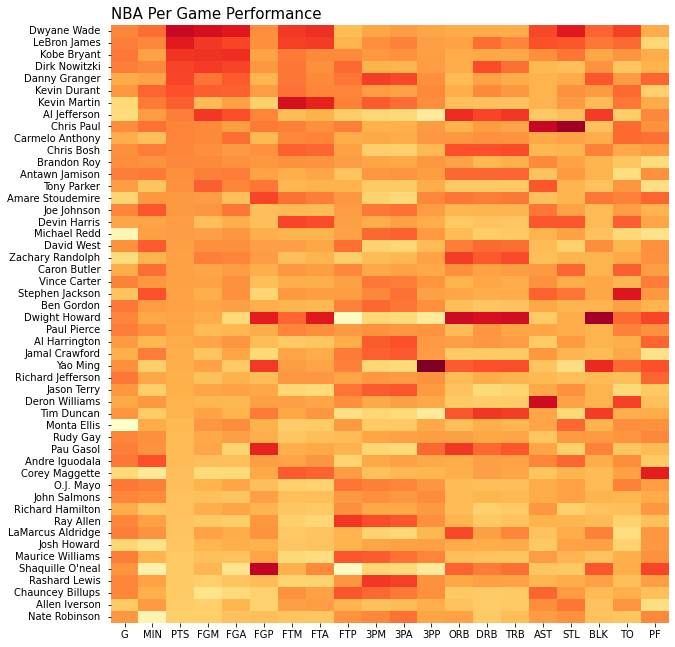

In [4]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 11))

# Create heatmap of normalized data
sns.heatmap(baller_norm, cmap='YlOrRd', cbar=False)

# Add chart title and labels
plt.title("NBA Per Game Performance", fontsize = 15, loc = 'left')
plt.ylabel("")

plt.show()

<div style="page-break-after: always;"></div>

## Spatial Chart

In [5]:
# Make empty map
m = folium.Map(location=[39.83,-98.58],  # centered on US lower 48
               tiles="OpenStreetMap", zoom_start=4)

# Add markers to map
for i in range(0, len(costcos)):
    folium.Marker(
        location=[costcos.iloc[i]['Latitude'], costcos.iloc[i]['Longitude']],
        popup=costcos.iloc[i]['City'],
    ).add_to(m)

# Add title
title_html = '''<h3 align="center" style="font-size:20px"><b>US Costco Locations (Lower 48)</b></h3>'''
m.get_root().html.add_child(folium.Element(title_html))

# Show map
m

<div style="page-break-after: always;"></div>

## Contour Chart

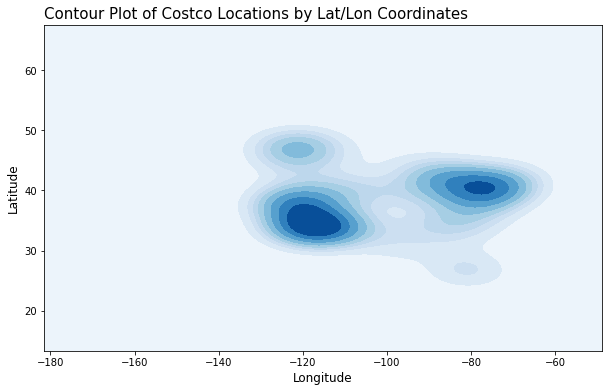

In [6]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(x=costcos.Longitude, y=costcos.Latitude, 
            cmap="Blues", shade=True, thresh=0)

# Add chart title and labels
plt.title("Contour Plot of Costco Locations by Lat/Lon Coordinates", 
          fontsize = 15, loc = 'left')
plt.xlabel("Longitude", fontsize = 12)
plt.ylabel("Latitude", fontsize = 12)

plt.show()